# Atividade 3.1 Parte 01
## Multiplicação de matrizes Redes neurais

## Parte A1
![A1-1](https://drive.google.com/uc?export=view&id=1CERWp0EC3Bouih-YkVxATVACkNFKyAIl)

![A1-2](https://drive.google.com/uc?export=view&id=1-E_QtFcesigW85DOIBxJU0aJi-DDfrvt)

### Considerações iniciais

O primeiro questionamento que eu me fiz era sobre o que exatamente são as camadas ocultas, uma camada de saída e de entrada, que não foi mencionada explicitamente.

A camada de entrada são os dados que eu vou imputar na minha rede, as camadas ocultas é a mágica que a rede neural faz multiplicando os pesos, somando e normalizando por meio de uma função o resultado para passar a diante o resultado.

Basicamente o que eu vou fazer é o seguinte:
- Vou instanciar o database que irei utilizar, que é o iris.
- Vou separar as informações que eu preciso em um dataframe, as informações são as features lenght da Petal e Sepal.
- Nosso objetivo vai ser verificar com base nessas features se são do tipo setosa ou versicolor.
- Vou separar em treino e teste como de costume.
- Vou inicializar os pesos das matrizes dos neuronios, como são duas camadas ocultas e uma final serão três vetores w1, w2 e w3.
- Em seguida vou passar o forward pass usando só multiplicação de matriz e a função de "softplus"
- No final vou passar a erro quadrático para ajustar os pesos e então começar o treinamento de fato.
- No final vou comparar os resultados com os do professor.



### Bibliotecas e tratamento de dados

In [ ]:
import torch
import torch.nn.functional as F
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Database Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Como a Setosa e Versicolor são representados por 0 e 1, vou filtrar todos que tem valors 0 e 1
filtro = y < 2
X = X[filtro]
y = y[filtro]

# Das minhas flores, vou pegar apenas asSepal Length coluna 0 e Petal Length coluna 2
X = X[:, [0, 2]]

# Dividindo em treino e teste
X_train_raw, X_test_raw, y_train_numpy, y_test_numpy = train_test_split(X, y, test_size=0.2, random_state=42)

# Vou Inicializar o objeto Scaler pra normalizar meus dados
scaler = StandardScaler()

# Vou aplicar o scaler bo treino pra aprender a média e desvio padrão do treino.
scaler.fit(X_train_raw)

StandardScaler()

### Análises do código até aqui

Até o momento segue normal o projeto da rede neural, a parte que poderia dar erro agora seria as etapas de nomralização dos dados para serem usados. O principal problema nessa etapa era o data leakage ao normalizar os conjuntos de treino e teste juntos, mas fiz a separação antes de fazer a normalização do conjunto de treino.

Os proximos passos são coisa mais técnicas sobre a técnica de programação, o uso de tensores é uma forma mais refinada de trabalhar com os conjuntos de dados que apenas arrays numpy, ele tem uma integração melhor com a GPU então são utilizados para serem utilizados na rede neural.

Basicamente já defini o formato dos meu dados de entrada, agora tenho que definir os pesos aleatórios dos meus neurônios, lembrando que são pesos aleatórios, mas normalizados.

### Construção das camadas e criação dos pesos da rede.

In [ ]:
# Transformar os dados baseados no que o scaler aprendeu com o treino
X_train = torch.tensor(scaler.transform(X_train_raw), dtype=torch.float32)

# Apenas colocando o conjunto de reste dentro do tensor, lembrando que ele não foi fitado só normalizado com base no treino
X_test = torch.tensor(scaler.transform(X_test_raw), dtype=torch.float32)

# Lembrando que o y de treino e teste tem que ser tensores também!
y_train = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)

# Só vou definir aqui a seed pros pesos inicias da rede, escolhi 42 pq obviamente é o valor final do universo
torch.manual_seed(42) # Para resultados reprodutíveis

# W1: Conecta as 2 entradas à 1ª camada oculta
W1 = torch.randn(2, 4, requires_grad=True)

# W2: Matriz 4x4
W2 = torch.randn(4, 4, requires_grad=True)

# W3: Matriz 4x1 (A camada de saída pedida no enunciado)
W3 = torch.randn(4, 1, requires_grad=True)

# Lista de parâmetros para o otimizador
params = [W1, W2, W3]

# Otimizador SGD, basicamente é isso aqui que o mano SGD vai ajustar a cada loop
optimizer = torch.optim.SGD(params, lr=0.01)


### Análises do Código até aqui

Incrível como a cada vez que vai se avançando no projeto fica mais abstrato os procedimentos necessários para poder conseguir essa dita rede neural. Percebi que eu tive que revisa brevemente os conceitos de multiplicação de matrizes pra entender como funciona.

Honestamente, ainda não ficou claro como ajustar ou como trabalha por baixo dos panos as partes, mas acredito que vá ficando melhor mais pra frente e isso seja apenas fruto da minha base escassa em matemática e estatistica.

Dito isso, os próximos passos são sobre o treinamento da rede. Eu irei utilizar o termo epochs para o treinamento pois é mais *chique* quando se trata de rede neural, visto que cada loop é uma época de treinamento.

In [ ]:
# TREINAMENTO
epochs = 1001

for epoch in range(epochs):

    # (Forward Pass)
    # Passo 1: Entrada x W1 -> Softplus
    h1 = F.softplus(torch.matmul(X_train, W1))

    # Passo 2: H1 x W2 (Matriz 4x4) -> Softplus
    h2 = F.softplus(torch.matmul(h1, W2))

    # Passo 3: H2 x W3 (Matriz 4x1) -> Saída Linear
    y_pred = torch.matmul(h2, W3)

    # Cálculo do Erro
    loss = F.mse_loss(y_pred, y_train)

    # --- Backpropagation (Aprendizado) ---
    optimizer.zero_grad() # Limpa os erros passados
    loss.backward()       # Calcula onde errou (gradientes)
    optimizer.step()      # Ajusta os pesos

    if epoch % 100 == 0:
        print(f'Época {epoch}, Erro: {loss.item():.4f}')



Época 0, Erro: 1.0682
Época 100, Erro: 0.0813
Época 200, Erro: 0.0634
Época 300, Erro: 0.0533
Época 400, Erro: 0.0464
Época 500, Erro: 0.0412
Época 600, Erro: 0.0372
Época 700, Erro: 0.0339
Época 800, Erro: 0.0312
Época 900, Erro: 0.0289
Época 1000, Erro: 0.0269


### Análises do Código até aqui

Eu demomorei para entender a diferença entre passar um 1x2 em cada interação como entrada para passar tudo de uma vez de forma vetorizada, basicamente isso explodia a minha mente, como assim o computador processa tudo de uma vez paralelamente??? Mas essa é a modalidade full batch que só foi fazer sentido quando vi o comando da questão B1.

Basicamente o que eu fiz aqui foi:
- Multiplicar a entrada com os pesos de w1, aplicar a função softplus e guardar esse resultado em h1.
- Multiplicar os resultados de h1 com os pesos de w2, aplicar a função softplus e guardar em h2.
- Multiplicar h2 pelos pesos de w3, e conseguir o resultado final que é uma matriz de 4x1 na variável y_pred.
- A partir do resultado final vou enfim comparar os resultados de y_pred com os resultados do meu y_train que é o valor esperado, isso será entrada da minha função de perda que é a do erro quadrático. e guardar na variável loss.
- Agora eu só preciso fazer o backpropagation de fato, usando a função optimizer e usando a função `loss.backward()` para poder identificar onde a rede errou e enfim ajustar os pesos usando `optimizer.step()`.
- Por fim eu vou mostrar por meio do print as épocas e os erros de cada época.

**ADENDO:** Só aqui eu já poderia encerrar a atividade pois eu já demonstrei pela função de perda de erro um resultado próximo ao do notebook que o professor pediu no comando para comparar, que é algo em torno de 0.02


Agora para finalizar, irei utilizar o conjunto de teste para verificar como tá a rede, se ela tá bem treinada kkkk

### Testando a rede treinada

In [ ]:
# Validando
print("\nTeste da Rede Neural")
with torch.no_grad():
    h1_test = F.softplus(torch.matmul(X_test, W1))
    h2_test = F.softplus(torch.matmul(h1_test, W2))
    pred_test = torch.matmul(h2_test, W3)

    # Como é classificação, arredondamos < 0.5 é classe 0, > 0.5 é classe 1
    predicted_classes = (pred_test > 0.5).float()
    accuracy = (predicted_classes == y_test).float().mean()
    print(f'Acurácia no teste: {accuracy.item()*100}%')


Teste da Rede Neural
Acurácia no teste: 100.0%


### Conclusão
É importante notar que definir que o torch não vai precisar guardar os valores de gradientes pois ele não irá utilizar eles novamente para o backpropagation, ele está apenas fazendo o forward pass que é apenas a utilização da rede.

Como vou realizar o forward pass manualemnte:
- Na váriavel h1_test vou guardar os resultados da mulplicação das features de teste pelo peso w1 TREINADO e aplicar a softplus para normalizar.
- Na váriavel h2_test irei guarda os resultados da multiplicação de h1_teste pela multiplicação de w2 e aplicar a softplus para normalizar.
- Por fim, irei guardar em pred_test os resultados da multiplicação de h2_test pelos pesos de w3 para obter o resultado final.
- Vou levantar uma métrica simples sobre acurácia com os resultados da rede usando um cast nos valores pela função floatm forçando ela definir valores como 1 e 0 para as minhas classes, considerando a linha de arredondamento do float 0.5
- Exemplo, se for um número menor que 0.5 ela acha que é a classe 0, se for um número maior que 0.5 é a classe 1. Isso é guardado como resultado da rede como um vetor com valores de 0 e 1 para os resultados.
- Por fim, para medir a acurácia irei calcular a média entre o que foi adivinhado pela rede e o valor real do conjunto de teste, e mostrarei isso em porcentagem.

## Parte B1
![B1-1](https://drive.google.com/uc?export=view&id=1kKTW2zre8qTlheBF-jA0gPcRvFQXlwvC)

![B1-2](https://drive.google.com/uc?export=view&id=1iPrLKB0xZ2cus7FQO8u0r9iVUI88ZPnw)

![B1-3](https://drive.google.com/uc?export=view&id=12ow6xPER8_K4a4YcrqsFwANE16124O8Z)



### Considerações iniciais

Acredito que a pratica A1 foi tão trabalhosa pois tive que fazer a rede neural do zaro, espero que as próximas atividades sejam apenas de reuso da rede assim como essa questão, B1.

Primeiramente, o diferencial dessa questão é justamente a forma que a rede neural será treinada, ou seja, por meio de mini-batches. Na atividade A1 eu fiz full batch que é o mesmo que pegar todas as linhas do dataset e inputar logo no inicio da rede e multiplicar pelos pesos e aplicar a função de softplus e repetir o processo até o final e voltar pelo backpropagation para ajustar os pesos, esse processo ocorre meio que paralelamente já, ou seja, parece que cada linha do meu banco de dados é calculado de forma paralela e sendo ajustada.

O que a atividade B1 propõe é justamente utilizar todo o processamento de dados do dataset, inclusive as definições e limitações do A1 e só modificar como a rede consome, ao invés de consuir tudo de uma vez quase paralelamente será quase sequencial o processo,só que no lugar de enviar o dataset todo eu mando partes dele e vou calibrando os pesos.

Agora vou começar repetindo todo o processo da questão A1 até o momento que eu tenho que ajustar a entrada das mini batches.

### Apenas Reaproveitando a Rede

In [ ]:
import torch
import torch.nn.functional as F
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Database Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Como a Setosa e Versicolor são representados por 0 e 1, vou filtrar todos que tem valors 0 e 1
filtro = y < 2
X = X[filtro]
y = y[filtro]

# Das minhas flores, vou pegar apenas asSepal Length coluna 0 e Petal Length coluna 2
X = X[:, [0, 2]]

# Dividindo em treino e teste
X_train_raw, X_test_raw, y_train_numpy, y_test_numpy = train_test_split(X, y, test_size=0.2, random_state=42)

# Vou Inicializar o objeto Scaler pra normalizar meus dados
scaler = StandardScaler()

# Vou aplicar o scaler bo treino pra aprender a média e desvio padrão do treino.
scaler.fit(X_train_raw)

# Transformar os dados baseados no que o scaler aprendeu com o treino
X_train = torch.tensor(scaler.transform(X_train_raw), dtype=torch.float32)

# Apenas colocando o conjunto de reste dentro do tensor, lembrando que ele não foi fitado só normalizado com base no treino
X_test = torch.tensor(scaler.transform(X_test_raw), dtype=torch.float32)

# Lembrando que o y de treino e teste tem que ser tensores também!
y_train = torch.tensor(y_train_numpy, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test_numpy, dtype=torch.float32).view(-1, 1)

### Começando a implementar os "Mini-Batches"

In [ ]:
# Criando 4 lotes de batches, depois eu vou mudar o tamanho para testar melhor
numero_de_lotes = 4
tamanho_total = X_train.shape[0]

# Tô pegando o tamanho inteiro da divisão
batch_size = tamanho_total // numero_de_lotes

print(f"Total de Treino: {tamanho_total}")
print(f"Tamanho do Batch: {batch_size}")

# Criando os pesos da rede novamente
torch.manual_seed(42)
W1 = torch.randn(2, 4, requires_grad=True)
W2 = torch.randn(4, 4, requires_grad=True)
W3 = torch.randn(4, 1, requires_grad=True)
params = [W1, W2, W3]
optimizer = torch.optim.SGD(params, lr=0.1)

# TREINAMENTO COM MINI-BATCHES
epochs = 100

for epoch in range(epochs):

    # Acumulador de erro para exibir no print (opcional, só pra gente ver)
    erro_da_epoca = 0

    # Vou rodar pelo número de lotes
    for i in range(numero_de_lotes):
        inicio = i * batch_size
        fim = inicio + batch_size

        # Pegar apenas o pedaço atual dos dados
        X_batch = X_train[inicio:fim]
        y_batch = y_train[inicio:fim]

        # Forward Pass com o mini-batche
        h1 = F.softplus(torch.matmul(X_batch, W1))
        h2 = F.softplus(torch.matmul(h1, W2))
        y_pred = torch.matmul(h2, W3)

        # Função MSE do Calculo de Erro
        loss = F.mse_loss(y_pred, y_batch)

        # Guardando o erro
        erro_da_epoca += loss.item()

        # Otimizando os pesos da rede
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Exibindo a média dos erros dos 4 lotes
    if epoch % 10 == 0:
        print(f'Época {epoch}, Erro Médio: {erro_da_epoca / numero_de_lotes:.4f}')

# TESTE FINAL
print("\n Teste Final Para os Mini-Batches")
with torch.no_grad():
    h1_test = F.softplus(torch.matmul(X_test, W1))
    h2_test = F.softplus(torch.matmul(h1_test, W2))
    pred_test = torch.matmul(h2_test, W3)

    predicted_classes = (pred_test > 0.5).float()
    accuracy = (predicted_classes == y_test).float().mean()
    print(f'Acurácia no teste: {accuracy.item()*100:.2f}%')

Total de Treino: 80
Tamanho do Batch: 20
Época 0, Erro Médio: 57.6058
Época 10, Erro Médio: 0.5768
Época 20, Erro Médio: 0.5463
Época 30, Erro Médio: 0.5335
Época 40, Erro Médio: 0.5245
Época 50, Erro Médio: 0.5143
Época 60, Erro Médio: 0.4960
Época 70, Erro Médio: 0.4256
Época 80, Erro Médio: 0.0269
Época 90, Erro Médio: 0.0227

 Teste Final Para os Mini-Batches
Acurácia no teste: 100.00%


### Conclusão

Parece que ganhou em performace, mas tem que considerar que cada época o código foi rodado mais 4 vezes! então podemos dizer que teria um custo talvez 4 vezes maior para cada época em relação a rede anterior? Não sei, vou perguntar pro professor. kkkkk

## Parte C1
### Fazer Explicação em aula

![C1-1](https://drive.google.com/uc?export=view&id=1WqJY2tC2XSokK3KuKYub4-trp0X6h-96)


## Parte D1

![D1-1](https://drive.google.com/uc?export=view&id=1oX33EF7wCqXMZbEL7943cqzFbrTgnR-H)

### Considerações Iniciais

O código anterior em resumo é o uso de uma rede neural definir o tipo de flor com base no tamanho das pétalas e sepalas, usando um perceptron criado em python usando orientação orientada o objetos, literalmente um perceprtron feito na mão.

Os dados sintéticos fornecidos são apenas medidas amostrais que já deixam claro as separações entre duas features de acordo com as classes target, acredito que seja apenas repetir o mesmo código do perceptron e colocar os valores de X e y no perceptron e manter as configurações.

### Implementação do Perceptron

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Dados Sintéticos

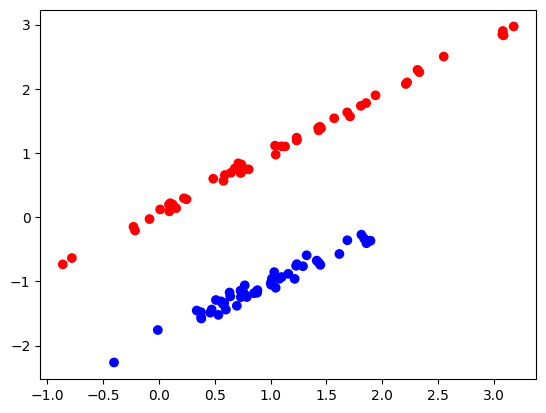

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.show()

### Treinando o Perceptron

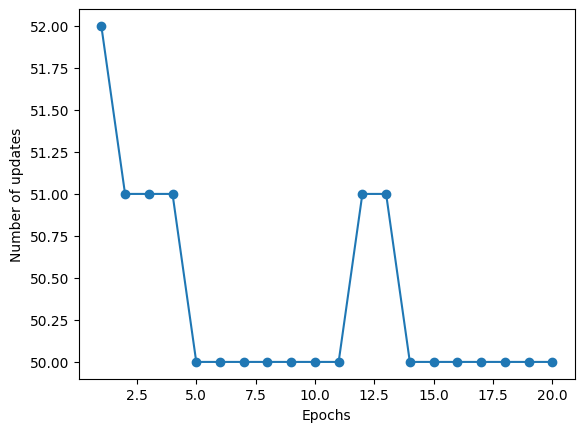

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=20)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### Função para plotar a Região de Decisão

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipython-input-2498697379.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


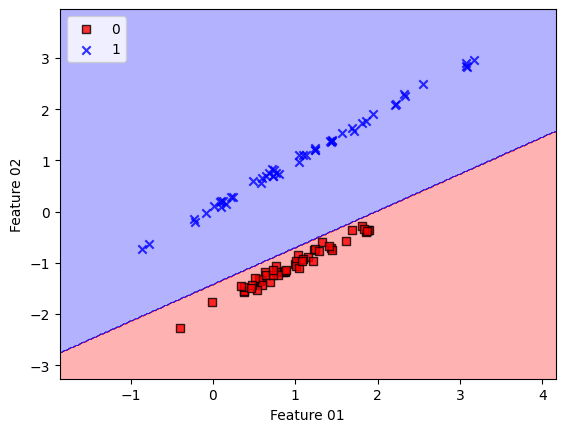

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature 01')
plt.ylabel('Feature 02')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### Conclusão

Vou escrever melhor, tá tarde já.

## Parte E1
![E1-1](https://drive.google.com/uc?export=view&id=18AB7cYXM-9idffnhFgudTT1gpTJT1cVl)


### Considerações iniciais

Os maiores desafios da questão estão em entender o uso da equação geral da reta, como o intercpt e a taxa de inclinação da reta estão interligadas os aprendizado da rede neural. Por exemplo entender que y = ax + b

- O a é o Slope, que é a inclinação da reta. (Que é o PESO) TRIPLE BAM KKKK
- O b é o Intercept, que é o bias.

Outro ponto é entender como o gradiente é utilizado para "melhorar" a rede, pense comigo, o uso do gradiente descendente é na função de perda, pois a gente consegue verificar quão errada está a nossa "equação da reta", mas se o gradiente está aplicado na função de perda como eu vou ajustar pelo método do gradiente descendente a minha equação da reta??? Eu consigo fazer esse ajuste pois a minha função de perda é COMPOSTA pela minha "Equação da Reta" e pelo meu resultado esperado, ou seja, quando eu verifico o meu gradiente em relação uma variavel dentro da função "Equação Geral da Reta" que está contida dentro da função "Perda" eu consigo por meio das derivadas parciais quanto a minha inclinação ou intercept tem que mudar para que a minha função de perda melhore!



### Gradiente Descendente

In [28]:
import numpy as np

# Dados de exemplo
np.random.seed(42)

# Features
entradas_x = np.random.rand(100)

# Resultados esperado
alvos_y = (2.5 * entradas_x + 1.2)

# Hiperparametros
taxa_aprendizado = 0.01
epocas = 201

# Parametros iniciais
slope = 0.0
intercept = 0.0

print(f"{'Epoca':<10} | {'Slope':<10} | {'Intercept':<10} | {'Erro (SSR)':<10}")

for epoca in range(epocas):
    # Predicao atual
    previsao = (slope * eixo_x) + intercept

    # Calculo do Erro (Soma dos Residuos Quadrados - SSR)
    erro = np.sum((alvo_y - previsao) ** 2)

    # Calculo das diferencas (Residuos)
    diferenca = alvo_y - previsao

    # Calculo dos Gradientes

    # Gradiente do Slope
    gradiente_slope = -2 * np.sum(diferenca * eixo_x)

    # Gradiente do Intercept
    gradiente_intercept = -2 * np.sum(diferenca)

    # Atualizacao
    slope = slope - (gradiente_slope * taxa_aprendizado)
    intercept = intercept - (gradiente_intercept * taxa_aprendizado)

    # Print do Processo
    if epoca % 10 == 0:
      print(f"{epoca:<10} | {slope:<10.4f} | {intercept:<10.4f} | {erro:<10.4f}")

print(f"Perceptron sem a função de ativação: y = {slope:.2f}x + {intercept:.2f}")
print(f"Em Redes Neurais: \n Peso = {slope:.2f}\n Bias {intercept:.2f}")

Epoca      | Slope      | Intercept  | Erro (SSR)
0          | 1.3200     | 0.4000     | 86.0000   
10         | 1.0337     | 0.6341     | 4.7089    
20         | 0.9657     | 0.8796     | 4.0418    
30         | 0.9084     | 1.0866     | 3.5674    
40         | 0.8601     | 1.2611     | 3.2301    
50         | 0.8193     | 1.4083     | 2.9903    
60         | 0.7849     | 1.5324     | 2.8197    
70         | 0.7559     | 1.6370     | 2.6985    
80         | 0.7315     | 1.7253     | 2.6122    
90         | 0.7109     | 1.7997     | 2.5509    
100        | 0.6935     | 1.8624     | 2.5073    
110        | 0.6788     | 1.9153     | 2.4763    
120        | 0.6665     | 1.9600     | 2.4543    
130        | 0.6561     | 1.9976     | 2.4386    
140        | 0.6473     | 2.0293     | 2.4274    
150        | 0.6399     | 2.0561     | 2.4195    
160        | 0.6336     | 2.0786     | 2.4139    
170        | 0.6283     | 2.0977     | 2.4099    
180        | 0.6239     | 2.1137     | 2.4070    


### Gradiente Descendente Estocástico

In [30]:
import numpy as np

# Dados de exemplo
np.random.seed(42)

# Features
entradas_x = np.random.rand(100)

# Resultados esperado
alvos_y = (2.5 * entradas_x + 1.2)

# Hiperparametros
tamanho_do_lote = 10
taxa_aprendizado = 0.1
epocas = 101

# Chute Inicial
slope = 0.0
intercept = 0.0

# Treinamento
for epoca in range(epocas):

    indices = np.arange(len(entradas_x))

    # Percorrendo os dados em batches
    for i in range(0, len(entradas_x), tamanho_do_lote):

        # Seleciona a fatia atual de indices
        indices_do_lote = indices[i : i + tamanho_do_lote]

        # Pega os dados correspondentes
        x_lote = entradas_x[indices_do_lote]
        y_lote = alvos_y[indices_do_lote]

        # Predicao
        previsoes = (slope * x_lote) + intercept
        erros = y_lote - previsoes

        # Gradientes (Media do erro do lote)
        grad_slope = -2 * np.mean(erros * x_lote)
        grad_intercept = -2 * np.mean(erros)

        # Ajuste dos pesos
        slope -= grad_slope * taxa_aprendizado
        intercept -= grad_intercept * taxa_aprendizado

        # Print do Processo
    if epoca % 10 == 0:
      print(f"Época: {epoca} |Slope: {slope:<.4f} |Intercept: {intercept:.4f} |Erro Médio {np.mean(erros):.10f}")

print(f"Perceptron sem a função de ativação: y = {slope:.2f}x + {intercept:.2f}")
print(f"Em Redes Neurais: \n Peso = {slope:.2f}\n Bias {intercept:.2f}")

Época: 0 |Slope: 1.1317 |Intercept: 1.7554 |Erro Médio 0.0915145587
Época: 10 |Slope: 2.1873 |Intercept: 1.3598 |Erro Médio -0.0223554995
Época: 20 |Slope: 2.4254 |Intercept: 1.2381 |Erro Médio -0.0053325317
Época: 30 |Slope: 2.4822 |Intercept: 1.2091 |Erro Médio -0.0012719865
Época: 40 |Slope: 2.4958 |Intercept: 1.2022 |Erro Médio -0.0003034112
Época: 50 |Slope: 2.4990 |Intercept: 1.2005 |Erro Médio -0.0000723737
Época: 60 |Slope: 2.4998 |Intercept: 1.2001 |Erro Médio -0.0000172635
Época: 70 |Slope: 2.4999 |Intercept: 1.2000 |Erro Médio -0.0000041179
Época: 80 |Slope: 2.5000 |Intercept: 1.2000 |Erro Médio -0.0000009823
Época: 90 |Slope: 2.5000 |Intercept: 1.2000 |Erro Médio -0.0000002343
Época: 100 |Slope: 2.5000 |Intercept: 1.2000 |Erro Médio -0.0000000559
Perceptron sem a função de ativação: y = 2.50x + 1.20
Em Redes Neurais: 
 Peso = 2.50
 Bias 1.20


### Conclusões

O ganho de performace e resultados do gradiente estocástico é espressivo em relação ao gradiente descendente normal, no primeiro exemplo parece que ficou preso em um vale local e não o vale final que procuramos quando treinamos o backpropagation.

## Parte F1

![F1-1](https://drive.google.com/uc?export=view&id=1c85Me_piM4tczcVCcPxIra0IDPlqxGX0)

![F1-2](https://drive.google.com/uc?export=view&id=1W_6UNbt9HH357Sxym4wf-EycyKIv-b-F)

### Considerações Iniciais

Vou resolver o slide 52, primeiro pois é mais fácil e menos trabalhoso, segundo pois é mais desafiador e ajuda a entender melhor os conceitos.

O principal desafio para entender como resolver essa atividade é entender o motivo de congelar os pesos e se eu posso utilizar quaisquer dados para inputar na rede para encontrar o bias, como o bias ele apenas irá "posicionar a reta" no melhor lugar possivel não é um

## Parte G1
